In [2]:
import gymnasium as gym
from reinforce_MC_algos import REINFORCEWithBaseline, REINFORCEWithoutBaseline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gamma = 0.99
num_episodes = 1000
max_steps = 500
render = False

Training REINFORCE without baseline...
Episode 0, Avg Reward: -500.00, Avg Length: 500.00
Episode 10, Avg Reward: -471.90, Avg Length: 472.10
Episode 20, Avg Reward: -495.30, Avg Length: 495.50
Episode 30, Avg Reward: -440.40, Avg Length: 440.80
Episode 40, Avg Reward: -478.20, Avg Length: 478.50
Episode 50, Avg Reward: -448.40, Avg Length: 448.80
Episode 60, Avg Reward: -382.90, Avg Length: 383.60
Episode 70, Avg Reward: -387.10, Avg Length: 388.00
Episode 80, Avg Reward: -339.40, Avg Length: 340.40
Episode 90, Avg Reward: -303.50, Avg Length: 304.50
Episode 100, Avg Reward: -211.20, Avg Length: 212.20
Episode 110, Avg Reward: -177.70, Avg Length: 178.70
Episode 120, Avg Reward: -175.30, Avg Length: 176.30
Episode 130, Avg Reward: -146.10, Avg Length: 147.10
Episode 140, Avg Reward: -125.70, Avg Length: 126.70
Episode 150, Avg Reward: -129.20, Avg Length: 130.20
Episode 160, Avg Reward: -141.30, Avg Length: 142.30
Episode 170, Avg Reward: -126.80, Avg Length: 127.80
Episode 180, Avg R

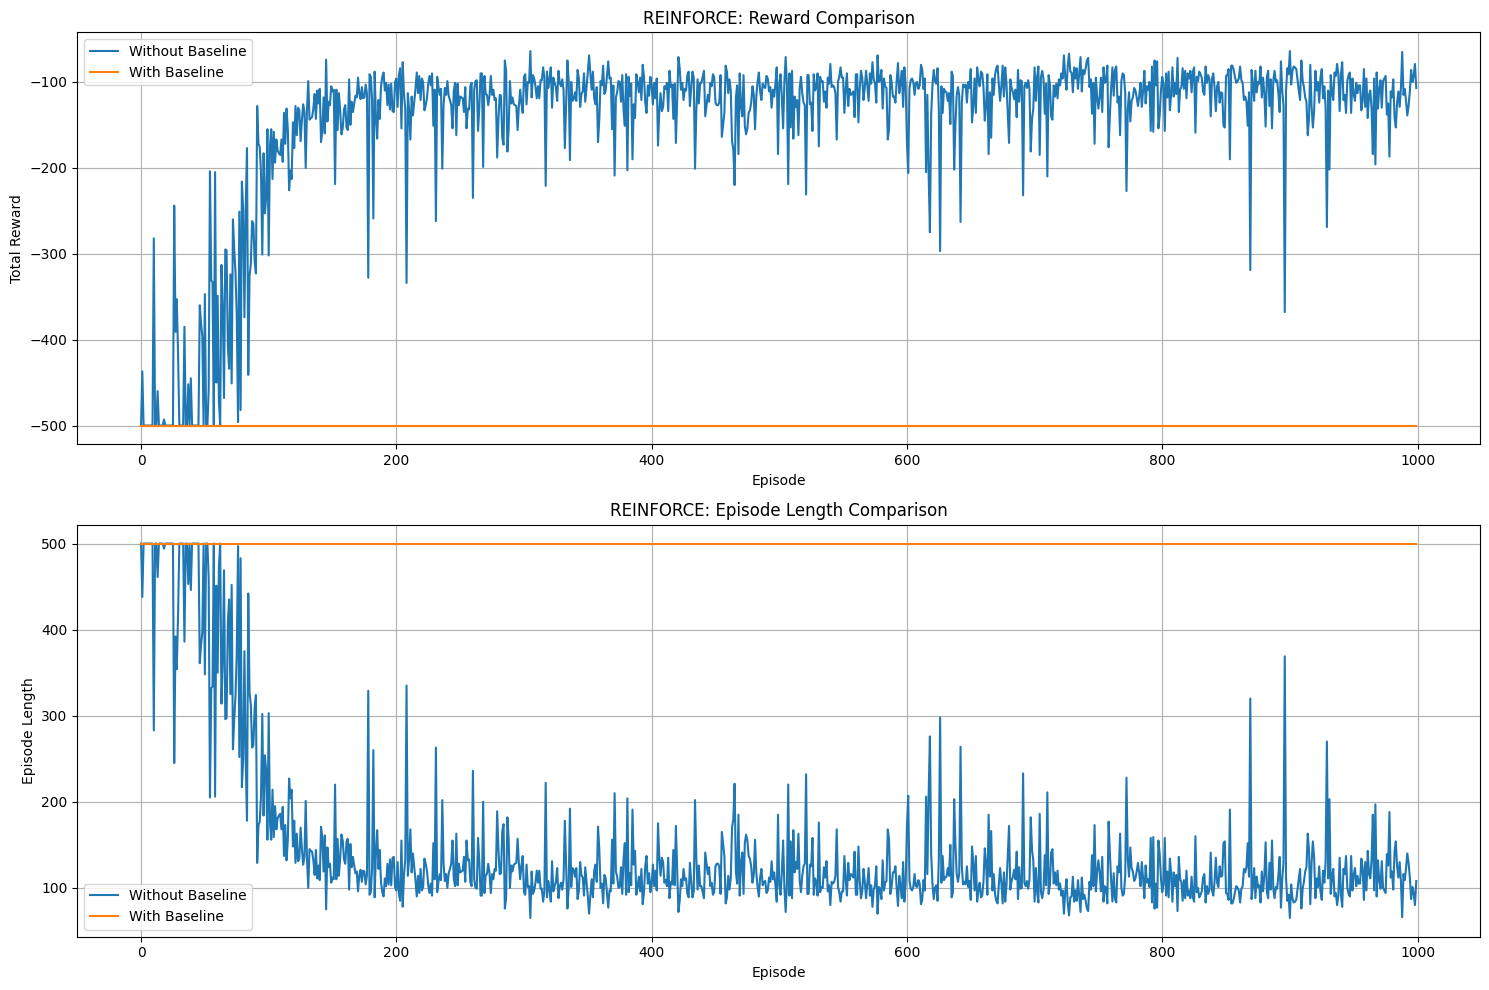


Final Performance (last 100 episodes):
Without Baseline - Avg Reward: -113.84, Avg Length: 114.84
With Baseline - Avg Reward: -500.00, Avg Length: 500.00


In [5]:
"""Train and compare both REINFORCE algorithms"""
env_name = "Acrobot-v1"
env = gym.make(env_name)

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# Initialize agents
agent_no_baseline = REINFORCEWithoutBaseline(state_dim, action_dim, gamma=gamma)
agent_with_baseline = REINFORCEWithBaseline(state_dim, action_dim, gamma=gamma)

# Training records
episode_rewards_no_baseline = []
episode_lengths_no_baseline = []
episode_rewards_with_baseline = []
episode_lengths_with_baseline = []

# Train without baseline
print("Training REINFORCE without baseline...")
for episode in range(num_episodes):
    state = env.reset()[0]
    episode_reward = 0
    episode_length = 0
    
    for step in range(max_steps):
        if render and episode % 100 == 0:
            env.render()
            
        # Select action
        action = agent_no_baseline.select_action(state)
        
        # Take action
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        done = terminated or truncated
        # Store reward
        agent_no_baseline.store_reward(reward)
        episode_reward += reward
        episode_length += 1
        
        # Update state
        state = next_state
        
        if done:
            break
            
    # Update agent
    agent_no_baseline.update()
    
    # Record episode stats
    episode_rewards_no_baseline.append(episode_reward)
    episode_lengths_no_baseline.append(episode_length)
    
    if episode % 10 == 0:
        avg_reward = np.mean(episode_rewards_no_baseline[-10:]) if episode > 0 else episode_reward
        avg_length = np.mean(episode_lengths_no_baseline[-10:]) if episode > 0 else episode_length
        print(f"Episode {episode}, Avg Reward: {avg_reward:.2f}, Avg Length: {avg_length:.2f}")

# Train with baseline
print("\nTraining REINFORCE with baseline...")
for episode in range(num_episodes):
    state = env.reset()[0]
    episode_reward = 0
    episode_length = 0
    
    for step in range(max_steps):
        if render and episode % 100 == 0:
            env.render()
            
        # Select action
        action = agent_with_baseline.select_action(state)
        
        # Take action
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        done = terminated or truncated
        # Store reward
        agent_with_baseline.store_reward(reward)
        episode_reward += reward
        episode_length += 1
        
        # Update state
        state = next_state
        
        if done:
            break
            
    # Update agent
    agent_with_baseline.update()
    
    # Record episode stats
    episode_rewards_with_baseline.append(episode_reward)
    episode_lengths_with_baseline.append(episode_length)
    
    if episode % 10 == 0:
        avg_reward = np.mean(episode_rewards_with_baseline[-10:]) if episode > 0 else episode_reward
        avg_length = np.mean(episode_lengths_with_baseline[-10:]) if episode > 0 else episode_length
        print(f"Episode {episode}, Avg Reward: {avg_reward:.2f}, Avg Length: {avg_length:.2f}")

env.close()

# Plot results
plt.figure(figsize=(15, 10))

# Plot rewards
plt.subplot(2, 1, 1)
plt.plot(episode_rewards_no_baseline, label='Without Baseline')
plt.plot(episode_rewards_with_baseline, label='With Baseline')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('REINFORCE: Reward Comparison')
plt.legend()
plt.grid(True)

# Plot episode lengths
plt.subplot(2, 1, 2)
plt.plot(episode_lengths_no_baseline, label='Without Baseline')
plt.plot(episode_lengths_with_baseline, label='With Baseline')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('REINFORCE: Episode Length Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('reinforce_comparison.png')
plt.show()

# Print final performance
print("\nFinal Performance (last 100 episodes):")
print(f"Without Baseline - Avg Reward: {np.mean(episode_rewards_no_baseline[-100:]):.2f}, Avg Length: {np.mean(episode_lengths_no_baseline[-100:]):.2f}")
print(f"With Baseline - Avg Reward: {np.mean(episode_rewards_with_baseline[-100:]):.2f}, Avg Length: {np.mean(episode_lengths_with_baseline[-100:]):.2f}")


In [11]:
import gymnasium as gym
from duellingDQN import DuelingDQNAgent
import numpy as np

In [ ]:
env = gym.make('Acrobot-v1')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = DuelingDQNAgent(state_dim, action_dim, [128, 64, 32], use_double_dqn=)
episodes = 500

In [12]:
scores = []
    
for episode in range(episodes):
    state, _ = env.reset()
    episode_reward = 0
    done = False
    
    while not done:
        action = agent.select_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        
        agent.memory.add(state, action, reward, next_state, done)
        agent.learn()
        
        state = next_state
        episode_reward += reward
    
    scores.append(episode_reward)
    
    if episode % 10 == 0:
        avg_score = np.mean(scores[-10:])
        print(f"Episode {episode}, Avg Reward: {avg_score:.2f}, Epsilon: {agent.epsilon:.2f}")

Episode 0, Avg Reward: -500.00, Epsilon: 0.01


KeyboardInterrupt: 